# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,Right,LF,4.0,94.0,88.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,Right,RCM,4.0,80.0,72.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,Right,RS,4.0,86.0,75.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,Right,RCB,3.0,76.0,75.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,Right,GK,3.0,43.0,60.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:

fifa['ValueNumeric'] = fifa['Value'].str.extract(r'(\d+\.\d+|\d+)')

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [27]:
# Your code here:

model = ols('Position ~ C(ValueNumeric)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


ValueError: shapes (18147,27) and (18147,27) not aligned: 27 (dim 1) != 18147 (dim 0)

What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:



After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [8]:
# Your code here:



What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [40]:
# Your code here:

fifa.dropna(inplace=True)

In [41]:
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [59]:
# Your code here:


from scipy.stats import linregress


X = sm.add_constant(fifa.Stamina)

X.head()

,const,Stamina
0,1.0,72.0
1,1.0,88.0
2,1.0,81.0
3,1.0,43.0
4,1.0,90.0


In [60]:
Y = fifa.SprintSpeed
Y.head()

0    86.0
1    91.0
2    90.0
3    58.0
4    76.0
Name: SprintSpeed, dtype: float64

In [61]:
model = sm.OLS(Y, X).fit()
model

In [62]:
predictions = model.predict(X) 
predictions.head()

0    69.747390
1    78.893108
2    74.891856
3    53.170777
4    80.036323
dtype: float64

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SprintSpeed   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        22:04:43   Log-Likelihood:                -69207.
No. Observations:               17918   AIC:                         1.384e+05
Df Residuals:                   17916   BIC:                         1.384e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5917      0.353     81.054      0.000      27.900      29.283
Stamina        0.5716      0.005    105.610      0.000       0.561       0.582
==============================================================================
Omnibus:                      327.547   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.652
Skew:                          -0.306   Prob(JB):                     7.99e-79
Kurtosis:                       3.328   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:

#Según el r cuadrado el modelo sólo captura el 38% de la variación de los datos.
    
#Y el  valor p es muy pequeño (0) esto significa que la pendiente es significativamente diferente de cero.


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [65]:
# Your code here:

X = sm.add_constant(fifa[['SprintSpeed', 'Stamina']])
Y = fifa.Potential

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model.summary()


# TENGO DUDAS DE SI EN "X" TIENE QUE IR SPRINTSPEED - POTENTIAL Y EN LA "Y" STAMINA O EN LA "Y" IRIA POTENTIAL

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Potential   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     587.2
Date:                Tue, 20 Aug 2019   Prob (F-statistic):          1.00e-247
Time:                        22:07:50   Log-Likelihood:                -57385.
No. Observations:               17918   AIC:                         1.148e+05
Df Residuals:                   17915   BIC:                         1.148e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          64.1964      0.213    301.123      0.000      63.779      64.614
SprintSpeed     0.0765      0.004     19.813      0.000       0.069       0.084
Stamina         0.0345      0.004      9.678      0.000       0.028       0.041
==============================================================================
Omnibus:                      193.026   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.792
Skew:                           0.256   Prob(JB):                     6.81e-44
Kurtosis:                       2.932   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:

#Según el r cuadrado el modelo sólo captura el 6% de la variación de los datos.
    
#Y el  valor p es muy alto (587) esto significa que la pendiente es significativamente similar a cero. ¿?

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [80]:
# Primero convertimos la columna ValueNumeric en un valor númerico.

fifa['ValueNumeric']=fifa['ValueNumeric'].astype('float')

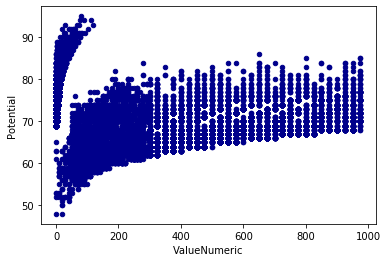

In [81]:
# Your code here:

ax1 = fifa.plot.scatter(x='ValueNumeric',y='Potential', c='DarkBlue')